In [50]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd

In [51]:
tf.__version__

'2.0.0'

In [52]:
keras.__version__

'2.2.4-tf'

## Building a simple MLP for classification problem

In [53]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [54]:
X_train_full.shape

(60000, 28, 28)

In [55]:
X_train_full.dtype

dtype('uint8')

In [56]:
# scale features pixel intensities 0 to 255
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [57]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

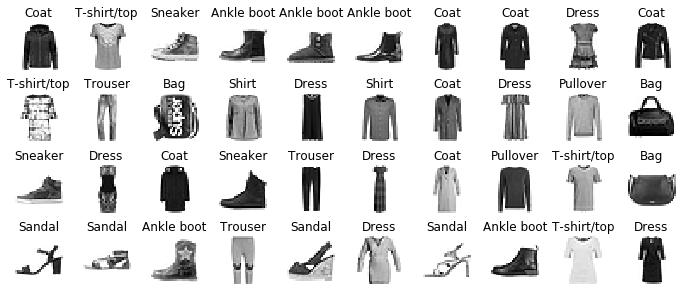

In [58]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [59]:
class_names[y_train[0]]

'Coat'

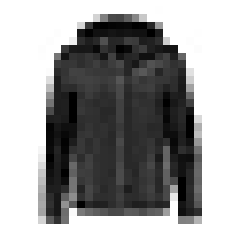

In [60]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

# Creating the model

In [61]:
model = keras.models.Sequential()

In [62]:
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

Similaire

In [63]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_16 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [64]:
model.layers

In [65]:
hidden1 = model.layers[1]

In [66]:
hidden1.name

'dense_15'

In [67]:
model.get_layer('dense_15') is hidden1

True

In [68]:
weights, biases = hidden1.get_weights()

In [69]:
weights

array([[-0.04154807, -0.00066715, -0.0639359 , ...,  0.05987111,
         0.00201424, -0.02982982],
       [-0.03750593, -0.03009142, -0.06095475, ...,  0.0446476 ,
        -0.05835601,  0.05469519],
       [ 0.05491541,  0.00606578,  0.06409259, ..., -0.07122215,
        -0.05156226, -0.06801626],
       ...,
       [-0.07116136,  0.06055234, -0.0357968 , ...,  0.05503634,
        -0.02088302, -0.03144732],
       [ 0.05748034,  0.07025468,  0.06815971, ...,  0.031715  ,
         0.05710095, -0.06777139],
       [ 0.07344767,  0.03574892,  0.034675  , ..., -0.00730602,
        -0.01729978, -0.04165593]], dtype=float32)

In [70]:
weights.shape

(784, 300)

Biases are initialized to zeros, we can set kernel_initializer for use different initialization method

In [71]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [72]:
biases.shape

(300,)

In [73]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [74]:
A = y_train[0]

Sparse categorical crossentropy vs categorical crossentropy

It depends of label: 

Sparse label > target class index 0 to 9 in this case

Categorical label > target class one-hot vector [0,0,0,0,0,0,1,0,0,0]

In [75]:
A

4

Convert sparse label

In [76]:
A = keras.utils.to_categorical(A, 10)

In [77]:
A

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [78]:
A = np.argmax(A)

In [79]:
A

4

In [80]:
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 7s 120us/sample - loss: 0.7109 - accuracy: 0.7673 - val_loss: 0.5443 - val_accuracy: 0.8096
Epoch 2/30
55000/55000 [==============================] - 6s 104us/sample - loss: 0.4881 - accuracy: 0.8296 - val_loss: 0.4463 - val_accuracy: 0.8480
Epoch 3/30
55000/55000 [==============================] - 6s 107us/sample - loss: 0.4454 - accuracy: 0.8439 - val_loss: 0.4422 - val_accuracy: 0.8500
Epoch 4/30
55000/55000 [==============================] - 6s 117us/sample - loss: 0.4174 - accuracy: 0.8537 - val_loss: 0.3906 - val_accuracy: 0.8692
Epoch 5/30
55000/55000 [==============================] - 6s 105us/sample - loss: 0.3989 - accuracy: 0.8599 - val_loss: 0.3803 - val_accuracy: 0.8676
Epoch 6/30
55000/55000 [==============================] - 5s 95us/sample - loss: 0.3813 - accuracy: 0.8651 - val_loss: 0.3824 - val_accuracy: 0.8718
Epoch 7/30
55000/55000 [============================

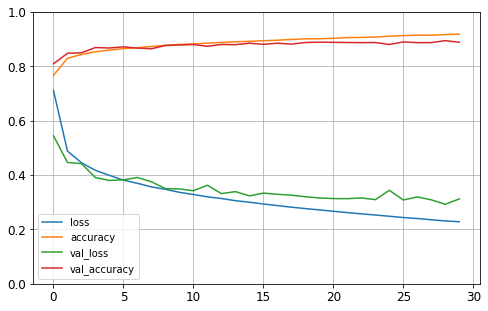

In [81]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [82]:
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [83]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3336667634725571, 0.8834]

Testing on new instance

In [84]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [85]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [86]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [87]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

## Building a simple MLP for regression problem

In [88]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [89]:
housing = fetch_california_housing()

In [90]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
housing.data, housing.target)

X_train, X_valid, y_train, y_valid = train_test_split(
X_train_full, y_train_full)

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_valid_sc = sc.transform(X_valid)
X_test_sc = sc.transform(X_test)

In [91]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train_sc.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(optimizer="sgd", loss="mean_squared_error")
history = model.fit(X_train_sc, y_train,
                    validation_data=(X_valid_sc, y_valid), epochs=20)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 65us/sample - loss: 0.8390 - val_loss: 0.6174
Epoch 2/20
11610/11610 [==============================] - 0s 35us/sample - loss: 0.6824 - val_loss: 0.4994
Epoch 3/20
11610/11610 [==============================] - 0s 35us/sample - loss: 0.4907 - val_loss: 0.5177
Epoch 4/20
11610/11610 [==============================] - 0s 35us/sample - loss: 0.4636 - val_loss: 0.4476
Epoch 5/20
11610/11610 [==============================] - 0s 35us/sample - loss: 0.4475 - val_loss: 0.4465
Epoch 6/20
11610/11610 [==============================] - 0s 33us/sample - loss: 0.4384 - val_loss: 0.4322
Epoch 7/20
11610/11610 [==============================] - 0s 35us/sample - loss: 0.4311 - val_loss: 0.4299
Epoch 8/20
11610/11610 [==============================] - 0s 40us/sample - loss: 0.4239 - val_loss: 0.4249
Epoch 9/20
11610/11610 [==============================] - 0s 36us/sample - loss: 0.4197 - val_l

In [92]:
mse_test = model.evaluate(X_test_sc, y_test)
X_new = X_test_sc[:3]
y_pred = model.predict(X_new)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

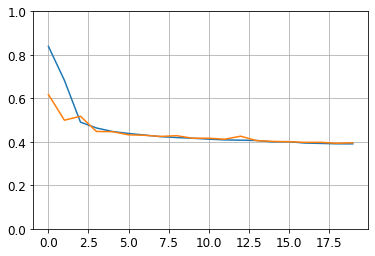

In [93]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [94]:
y_pred

array([[1.6706402],
       [1.9880502],
       [1.6035137]], dtype=float32)

## Building Complex Models Using the Functional API

In [95]:
input_ = keras.layers.Input(shape=X_train_sc.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [96]:
model.compile(optimizer="sgd", loss="mean_squared_error")
history = model.fit(X_train_sc, y_train,
                    validation_data=(X_valid_sc, y_valid), epochs=20)


Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 90us/sample - loss: 1.3692 - val_loss: 0.5619
Epoch 2/20
11610/11610 [==============================] - 0s 37us/sample - loss: nan - val_loss: nan
Epoch 3/20
11610/11610 [==============================] - 0s 36us/sample - loss: nan - val_loss: nan
Epoch 4/20
11610/11610 [==============================] - 0s 36us/sample - loss: nan - val_loss: nan
Epoch 5/20
11610/11610 [==============================] - 0s 35us/sample - loss: nan - val_loss: nan
Epoch 6/20
11610/11610 [==============================] - 0s 37us/sample - loss: nan - val_loss: nan
Epoch 7/20
11610/11610 [==============================] - 0s 37us/sample - loss: nan - val_loss: nan
Epoch 8/20
11610/11610 [==============================] - 1s 46us/sample - loss: nan - val_loss: nan
Epoch 9/20
11610/11610 [==============================] - 1s 43us/sample - loss: nan - val_loss: nan
Epoch 10/20
11610/11610 [===========

In [97]:
mse_test = model.evaluate(X_test_sc, y_test)
X_new = X_test_sc[:3]
y_pred = model.predict(X_new)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

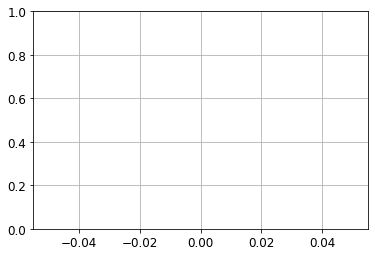

In [98]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [99]:
y_pred

array([[nan],
       [nan],
       [nan]], dtype=float32)

# Send subset through deep path, and another through short path

In [100]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [101]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [102]:
X_train_A, X_train_B = X_train_sc[:, :5], X_train_sc[:, 2:]
X_valid_A, X_valid_B = X_valid_sc[:, :5], X_valid_sc[:, 2:]
X_test_A, X_test_B = X_test_sc[:, :5], X_test_sc[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 74us/sample - loss: 2.0702 - val_loss: 0.9954
Epoch 2/20
11610/11610 [==============================] - 0s 39us/sample - loss: 0.8979 - val_loss: 0.8020
Epoch 3/20
11610/11610 [==============================] - 0s 38us/sample - loss: 0.7778 - val_loss: 0.7225
Epoch 4/20
11610/11610 [==============================] - 0s 39us/sample - loss: 0.7156 - val_loss: 0.6771
Epoch 5/20
11610/11610 [==============================] - 0s 37us/sample - loss: 0.6750 - val_loss: 0.6441
Epoch 6/20
11610/11610 [==============================] - 0s 38us/sample - loss: 0.6444 - val_loss: 0.6196
Epoch 7/20
11610/11610 [==============================] - 0s 39us/sample - loss: 0.6194 - val_loss: 0.5982
Epoch 8/20
11610/11610 [==============================] - 0s 38us/sample - loss: 0.5983 - val_loss: 0.5817
Epoch 9/20
11610/11610 [==============================] - 0s 39us/sample - loss: 0.5812 - val_l

In [103]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [104]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [105]:
history = model.fit(
[X_train_A, X_train_B], [y_train, y_train], epochs=20,
validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 132us/sample - loss: 0.9461 - main_output_loss: 0.8290 - aux_output_loss: 1.9978 - val_loss: 0.5916 - val_main_output_loss: 0.5316 - val_aux_output_loss: 1.1346
Epoch 2/20
11610/11610 [==============================] - 1s 45us/sample - loss: 0.6113 - main_output_loss: 0.5621 - aux_output_loss: 1.0527 - val_loss: 0.5360 - val_main_output_loss: 0.4940 - val_aux_output_loss: 0.9172
Epoch 3/20
11610/11610 [==============================] - 1s 44us/sample - loss: 0.5264 - main_output_loss: 0.4882 - aux_output_loss: 0.8693 - val_loss: 0.5001 - val_main_output_loss: 0.4663 - val_aux_output_loss: 0.8072
Epoch 4/20
11610/11610 [==============================] - 1s 46us/sample - loss: 0.4964 - main_output_loss: 0.4649 - aux_output_loss: 0.7817 - val_loss: 0.4837 - val_main_output_loss: 0.4560 - val_aux_output_loss: 0.7358
Epoch 5/20
11610/11610 [==============================] - 1s 47us/

In [106]:
total_loss, main_loss, aux_loss = model.evaluate(
[X_test_A, X_test_B], [y_test, y_test])

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [107]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

# Using the Subclassing API to build Dynamic Models

In [108]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # handles standard args (e.g., name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
model = WideAndDeepModel()

## Saving and Restoring a Model

In [109]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train_sc.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(optimizer="sgd", loss="mean_squared_error")
history = model.fit(X_train_sc, y_train,
                    validation_data=(X_valid_sc, y_valid), epochs=20)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 73us/sample - loss: 0.9505 - val_loss: 0.9195
Epoch 2/20
11610/11610 [==============================] - 0s 40us/sample - loss: 0.6429 - val_loss: 0.5008
Epoch 3/20
11610/11610 [==============================] - 0s 36us/sample - loss: 0.5007 - val_loss: 0.4633
Epoch 4/20
11610/11610 [==============================] - 0s 35us/sample - loss: 0.4841 - val_loss: 0.4596
Epoch 5/20
11610/11610 [==============================] - 1s 56us/sample - loss: 0.4583 - val_loss: 0.4432
Epoch 6/20
11610/11610 [==============================] - 1s 53us/sample - loss: 0.4414 - val_loss: 0.4404
Epoch 7/20
11610/11610 [==============================] - 1s 44us/sample - loss: 0.4332 - val_loss: 0.4306
Epoch 8/20
11610/11610 [==============================] - 0s 40us/sample - loss: 0.4260 - val_loss: 0.4328
Epoch 9/20
11610/11610 [==============================] - 0s 36us/sample - loss: 0.4232 - val_l

In [110]:
model.save("my_keras_model.h5")

In [111]:
model = keras.models.load_model("my_keras_model.h5")

## Using Callbacks

In [112]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train_sc.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(optimizer="sgd", loss="mean_squared_error")
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train_sc, y_train, epochs=10, callbacks=[checkpoint_cb])

Train on 11610 samples
Epoch 1/10
11610/11610 [==============================] - 1s 73us/sample - loss: 0.8420
Epoch 2/10
11610/11610 [==============================] - 0s 30us/sample - loss: 0.8189
Epoch 3/10
11610/11610 [==============================] - 0s 32us/sample - loss: 0.4887
Epoch 4/10
11610/11610 [==============================] - 0s 27us/sample - loss: 0.4697
Epoch 5/10
11610/11610 [==============================] - 0s 27us/sample - loss: 0.4554
Epoch 6/10
11610/11610 [==============================] - 0s 30us/sample - loss: 0.4453
Epoch 7/10
11610/11610 [==============================] - 0s 30us/sample - loss: 0.4363
Epoch 8/10
11610/11610 [==============================] - 0s 28us/sample - loss: 0.4274
Epoch 9/10
11610/11610 [==============================] - 0s 28us/sample - loss: 0.4218
Epoch 10/10
11610/11610 [==============================] - 0s 28us/sample - loss: 0.4222


If we use validation set during training, save_best_only=True will only save the model when its performance on the validation set is the best so far

In [113]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",
save_best_only=True)

history = model.fit(X_train_sc, y_train, epochs=10,
                    validation_data=(X_valid_sc, y_valid),
                    callbacks=[checkpoint_cb])

model = keras.models.load_model("my_keras_model.h5") # roll back to best model

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 0s 42us/sample - loss: 0.4101 - val_loss: 0.4062
Epoch 2/10
11610/11610 [==============================] - 0s 38us/sample - loss: 0.4119 - val_loss: 0.4118
Epoch 3/10
11610/11610 [==============================] - 0s 39us/sample - loss: 0.4022 - val_loss: 0.4015
Epoch 4/10
11610/11610 [==============================] - 0s 34us/sample - loss: 0.4004 - val_loss: 0.4173
Epoch 5/10
11610/11610 [==============================] - 0s 36us/sample - loss: 0.3937 - val_loss: 0.4122
Epoch 6/10
11610/11610 [==============================] - 0s 39us/sample - loss: 0.3926 - val_loss: 0.3991
Epoch 7/10
11610/11610 [==============================] - 0s 35us/sample - loss: 0.3917 - val_loss: 0.3976
Epoch 8/10
11610/11610 [==============================] - 0s 35us/sample - loss: 0.3886 - val_loss: 0.3865
Epoch 9/10
11610/11610 [==============================] - 0s 37us/sample - loss: 0.4038 - val_l

EarlyStopping will interrupt training when it measures no progress on the validation set for a number of epochs (defined by the patience argument)

In [114]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train_sc, y_train, epochs=100,
                    validation_data=(X_valid_sc, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 59us/sample - loss: 0.3975 - val_loss: 0.3849
Epoch 2/100
11610/11610 [==============================] - 0s 37us/sample - loss: 0.3875 - val_loss: 0.3820
Epoch 3/100
11610/11610 [==============================] - 0s 37us/sample - loss: 0.3791 - val_loss: 0.3814
Epoch 4/100
11610/11610 [==============================] - 0s 36us/sample - loss: 0.3766 - val_loss: 0.3807
Epoch 5/100
11610/11610 [==============================] - 0s 34us/sample - loss: 0.3799 - val_loss: 0.3817
Epoch 6/100
11610/11610 [==============================] - 0s 36us/sample - loss: 0.3733 - val_loss: 0.3754
Epoch 7/100
11610/11610 [==============================] - 0s 34us/sample - loss: 0.3722 - val_loss: 0.3914
Epoch 8/100
11610/11610 [==============================] - 0s 34us/sample - loss: 0.3690 - val_loss: 0.3799
Epoch 9/100
11610/11610 [==============================] - 0s 42us/sample - loss: 0.369

In [115]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

## Using TensorBoard for Visualization

In [116]:
import os

root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_06_07-15_15_22'

In [117]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train_sc, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 1s 51us/sample - loss: 0.3337 - val_loss: 28173.1003
Epoch 2/30
11610/11610 [==============================] - 0s 37us/sample - loss: 0.3332 - val_loss: 34620.2842
Epoch 3/30
11610/11610 [==============================] - 0s 35us/sample - loss: 0.3385 - val_loss: 67936.7165
Epoch 4/30
11610/11610 [==============================] - 0s 37us/sample - loss: 0.3383 - val_loss: 81603.3297
Epoch 5/30
11610/11610 [==============================] - 0s 37us/sample - loss: 0.3319 - val_loss: 40445.9020
Epoch 6/30
11610/11610 [==============================] - 0s 35us/sample - loss: 0.3358 - val_loss: 50242.9862
Epoch 7/30
11610/11610 [==============================] - 0s 38us/sample - loss: 0.3310 - val_loss: 70192.2514
Epoch 8/30
11610/11610 [==============================] - 0s 37us/sample - loss: 0.3338 - val_loss: 36543.2390
Epoch 9/30
11610/11610 [==============================] - 0s 36

In [118]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

Reusing TensorBoard on port 6006 (pid 5916), started 1 day, 2:21:43 ago. (Use '!kill 5916' to kill it.)

## Fine-Tuning Neural Network Hyperparameters

In [119]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [120]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [121]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [122]:
keras_reg.fit(X_train_sc, y_train, epochs=100,
              validation_data=(X_valid_sc, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

mse_test = keras_reg.score(X_test_sc, y_test)
X_new = X_test_sc[:3]
y_pred = keras_reg.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 63us/sample - loss: 1.0639 - val_loss: 0.6243
Epoch 2/100
11610/11610 [==============================] - 0s 35us/sample - loss: 0.7380 - val_loss: 0.5835
Epoch 3/100
11610/11610 [==============================] - 0s 35us/sample - loss: 0.5608 - val_loss: 0.5293
Epoch 4/100
11610/11610 [==============================] - 0s 35us/sample - loss: 0.5221 - val_loss: 0.4977
Epoch 5/100
11610/11610 [==============================] - 0s 35us/sample - loss: 0.4979 - val_loss: 0.4796
Epoch 6/100
11610/11610 [==============================] - 0s 35us/sample - loss: 0.4836 - val_loss: 0.4731
Epoch 7/100
11610/11610 [==============================] - 0s 35us/sample - loss: 0.4727 - val_loss: 0.4623
Epoch 8/100
11610/11610 [==============================] - 0s 33us/sample - loss: 0.4652 - val_loss: 0.4609
Epoch 9/100
11610/11610 [==============================] - 0s 36us/sample - loss: 0.459

Epoch 76/100
11610/11610 [==============================] - 0s 41us/sample - loss: 0.3659 - val_loss: 0.3725
Epoch 77/100
11610/11610 [==============================] - 0s 42us/sample - loss: 0.3657 - val_loss: 0.3722
Epoch 78/100
11610/11610 [==============================] - 0s 40us/sample - loss: 0.3656 - val_loss: 0.3733
Epoch 79/100
11610/11610 [==============================] - 0s 35us/sample - loss: 0.3649 - val_loss: 0.3701
Epoch 80/100
11610/11610 [==============================] - 0s 35us/sample - loss: 0.3641 - val_loss: 0.3676
Epoch 81/100
11610/11610 [==============================] - 0s 40us/sample - loss: 0.3637 - val_loss: 0.3702
Epoch 82/100
11610/11610 [==============================] - 0s 42us/sample - loss: 0.3640 - val_loss: 0.3694
Epoch 83/100
11610/11610 [==============================] - 0s 38us/sample - loss: 0.3624 - val_loss: 0.3668
Epoch 84/100
11610/11610 [==============================] - 0s 40us/sample - loss: 0.3625 - val_loss: 0.3688
Epoch 85/100
11610/

In [123]:
mse_test

-0.3516928117866664

In [124]:
y_pred

array([1.5802462, 1.5738997, 1.5426967], dtype=float32)

In [125]:
y_test[:3]

array([1.504, 1.596, 1.313])

In [126]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)

rnd_search_cv.fit(X_train_sc, y_train, epochs=100,
                  validation_data=(X_valid_sc, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 75us/sample - loss: 3.0336 - val_loss: 1.5935
Epoch 2/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.9863 - val_loss: 0.6941
Epoch 3/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.6100 - val_loss: 0.5443
Epoch 4/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.5382 - val_loss: 0.5219
Epoch 5/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.5235 - val_loss: 0.5202
Epoch 6/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.5202 - val_loss: 0.5211
Epoch 7/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.5189 - val_loss: 0.5225
Epoch 8/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.5182 - val_loss: 0.5234
Epoch 9/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.5177 - val_loss: 0.523

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 89us/sample - loss: 3.1122 - val_loss: 1.6597
Epoch 2/100
7740/7740 [==============================] - 0s 40us/sample - loss: 1.1820 - val_loss: 0.8656
Epoch 3/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.7780 - val_loss: 0.6891
Epoch 4/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.6806 - val_loss: 0.6385
Epoch 5/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.6477 - val_loss: 0.6182
Epoch 6/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.6294 - val_loss: 0.6055
Epoch 7/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.6160 - val_loss: 0.5947
Epoch 8/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.6046 - val_loss: 0.5832
Epoch 9/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.5956 - val_loss: 0.578

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 88us/sample - loss: 3.3261 - val_loss: 1.5425
Epoch 2/100
7740/7740 [==============================] - 0s 55us/sample - loss: 1.0455 - val_loss: 0.7677
Epoch 3/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.6812 - val_loss: 0.6145
Epoch 4/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.6067 - val_loss: 0.5864
Epoch 5/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.5870 - val_loss: 0.5848
Epoch 6/100
7740/7740 [==============================] - 0s 53us/sample - loss: 0.5797 - val_loss: 0.5838
Epoch 7/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.5754 - val_loss: 0.5746
Epoch 8/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.5712 - val_loss: 0.5631
Epoch 9/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.5685 - val_loss: 0.563

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 109us/sample - loss: 1.2908 - val_loss: 0.5505
Epoch 2/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.5566 - val_loss: 0.5375
Epoch 3/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.5427 - val_loss: 0.5313
Epoch 4/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.5356 - val_loss: 0.5341
Epoch 5/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.5299 - val_loss: 0.5307
Epoch 6/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.5267 - val_loss: 0.5378
Epoch 7/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.5239 - val_loss: 0.5309
Epoch 8/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.5222 - val_loss: 0.5416
Epoch 9/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.5203 - val_loss: 0.53

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 72us/sample - loss: 1.9306 - val_loss: 0.6430
Epoch 2/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.6241 - val_loss: 0.5704
Epoch 3/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.5754 - val_loss: 0.5422
Epoch 4/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.5579 - val_loss: 0.5312
Epoch 5/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.5416 - val_loss: 0.5384
Epoch 6/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.5340 - val_loss: 0.5484
Epoch 7/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.5324 - val_loss: 0.5277
Epoch 8/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.7023 - val_loss: 0.5243
Epoch 9/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.5884 - val_loss: 0.519

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 93us/sample - loss: 2.5267 - val_loss: 0.6724
Epoch 2/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.6579 - val_loss: 0.5664
Epoch 3/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.6301 - val_loss: 0.5496
Epoch 4/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.5893 - val_loss: 0.5427
Epoch 5/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.5680 - val_loss: 0.5647
Epoch 6/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.5559 - val_loss: 0.5819
Epoch 7/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.5506 - val_loss: 0.5331
Epoch 8/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.7382 - val_loss: 0.5371
Epoch 9/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.6187 - val_loss: 0.519

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 130us/sample - loss: 2.8237 - val_loss: 1.5502
Epoch 2/100
7740/7740 [==============================] - 0s 43us/sample - loss: 1.0594 - val_loss: 1.0842
Epoch 3/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.8679 - val_loss: 0.8699
Epoch 4/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.7838 - val_loss: 0.7725
Epoch 5/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.7382 - val_loss: 0.7230
Epoch 6/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.7086 - val_loss: 0.6915
Epoch 7/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.6859 - val_loss: 0.6690
Epoch 8/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.6669 - val_loss: 0.6503
Epoch 9/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.6498 - val_loss: 0.63

7740/7740 [==============================] - 0s 42us/sample - loss: 0.4115 - val_loss: 0.4177
Epoch 78/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4107 - val_loss: 0.4163
Epoch 79/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4099 - val_loss: 0.4168
Epoch 80/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4090 - val_loss: 0.4156
Epoch 81/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.4082 - val_loss: 0.4164
Epoch 82/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4077 - val_loss: 0.4145
Epoch 83/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4067 - val_loss: 0.4133
Epoch 84/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.4061 - val_loss: 0.4133
Epoch 85/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4054 - val_loss: 0.4117
Epoch 86/100
7740/7740 [==========================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 93us/sample - loss: 2.6013 - val_loss: 1.2900
Epoch 2/100
7740/7740 [==============================] - 0s 42us/sample - loss: 1.0055 - val_loss: 0.8685
Epoch 3/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.8136 - val_loss: 0.7665
Epoch 4/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.7544 - val_loss: 0.7191
Epoch 5/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.7190 - val_loss: 0.6874
Epoch 6/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.6908 - val_loss: 0.6634
Epoch 7/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.6677 - val_loss: 0.6393
Epoch 8/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.6469 - val_loss: 0.6203
Epoch 9/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.6281 - val_loss: 0.603

7740/7740 [==============================] - 0s 43us/sample - loss: 0.4040 - val_loss: 0.4121
Epoch 78/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4032 - val_loss: 0.4116
Epoch 79/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.4024 - val_loss: 0.4111
Epoch 80/100
7740/7740 [==============================] - 0s 50us/sample - loss: 0.4018 - val_loss: 0.4103
Epoch 81/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4012 - val_loss: 0.4099
Epoch 82/100
7740/7740 [==============================] - 0s 50us/sample - loss: 0.4005 - val_loss: 0.4099
Epoch 83/100
7740/7740 [==============================] - 0s 53us/sample - loss: 0.3997 - val_loss: 0.4090
Epoch 84/100
7740/7740 [==============================] - 0s 50us/sample - loss: 0.3990 - val_loss: 0.4085
Epoch 85/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3987 - val_loss: 0.4080
Epoch 86/100
7740/7740 [==========================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 90us/sample - loss: 2.8288 - val_loss: 1.5618
Epoch 2/100
7740/7740 [==============================] - 0s 43us/sample - loss: 1.1074 - val_loss: 0.8979
Epoch 3/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.8057 - val_loss: 0.7460
Epoch 4/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.7208 - val_loss: 0.6882
Epoch 5/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.6815 - val_loss: 0.6578
Epoch 6/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.6561 - val_loss: 0.6360
Epoch 7/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.6367 - val_loss: 0.6181
Epoch 8/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.6201 - val_loss: 0.6026
Epoch 9/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.6053 - val_loss: 0.589

7740/7740 [==============================] - 0s 63us/sample - loss: 0.4102 - val_loss: 0.4132
Epoch 78/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.4097 - val_loss: 0.4119
Epoch 79/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.4090 - val_loss: 0.4114
Epoch 80/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.4083 - val_loss: 0.4105
Epoch 81/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.4078 - val_loss: 0.4103
Epoch 82/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.4070 - val_loss: 0.4103
Epoch 83/100
7740/7740 [==============================] - 1s 73us/sample - loss: 0.4064 - val_loss: 0.4093
Epoch 84/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.4055 - val_loss: 0.4086
Epoch 85/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.4053 - val_loss: 0.4084
Epoch 86/100
7740/7740 [==========================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 91us/sample - loss: 3.4369 - val_loss: 2.5879
Epoch 2/100
7740/7740 [==============================] - 0s 44us/sample - loss: 1.8731 - val_loss: 1.9987
Epoch 3/100
7740/7740 [==============================] - 0s 46us/sample - loss: 1.5129 - val_loss: 1.6050
Epoch 4/100
7740/7740 [==============================] - 0s 47us/sample - loss: 1.2808 - val_loss: 1.3267
Epoch 5/100
7740/7740 [==============================] - 0s 41us/sample - loss: 1.1071 - val_loss: 1.1191
Epoch 6/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.9758 - val_loss: 0.9714
Epoch 7/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.8780 - val_loss: 0.8662
Epoch 8/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.8077 - val_loss: 0.7960
Epoch 9/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.7582 - val_loss: 0.748

7740/7740 [==============================] - 0s 41us/sample - loss: 0.4575 - val_loss: 0.4667
Epoch 78/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4561 - val_loss: 0.4654
Epoch 79/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4549 - val_loss: 0.4649
Epoch 80/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4536 - val_loss: 0.4632
Epoch 81/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4523 - val_loss: 0.4635
Epoch 82/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4513 - val_loss: 0.4616
Epoch 83/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4500 - val_loss: 0.4597
Epoch 84/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.4488 - val_loss: 0.4592
Epoch 85/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4477 - val_loss: 0.4574
Epoch 86/100
7740/7740 [==========================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 144us/sample - loss: 3.7606 - val_loss: 2.5575
Epoch 2/100
7740/7740 [==============================] - 0s 58us/sample - loss: 1.8805 - val_loss: 1.4946
Epoch 3/100
7740/7740 [==============================] - 0s 45us/sample - loss: 1.2876 - val_loss: 1.1356
Epoch 4/100
7740/7740 [==============================] - 0s 61us/sample - loss: 1.0291 - val_loss: 0.9305
Epoch 5/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.8713 - val_loss: 0.8035
Epoch 6/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.7716 - val_loss: 0.7241
Epoch 7/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.7093 - val_loss: 0.6743
Epoch 8/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.6687 - val_loss: 0.6412
Epoch 9/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.6409 - val_loss: 0.61

7740/7740 [==============================] - 0s 49us/sample - loss: 0.4298 - val_loss: 0.4376
Epoch 78/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.4292 - val_loss: 0.4373
Epoch 79/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.4287 - val_loss: 0.4367
Epoch 80/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4280 - val_loss: 0.4359
Epoch 81/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.4276 - val_loss: 0.4357
Epoch 82/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.4270 - val_loss: 0.4354
Epoch 83/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.4265 - val_loss: 0.4346
Epoch 84/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4259 - val_loss: 0.4340
Epoch 85/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.4254 - val_loss: 0.4337
Epoch 86/100
7740/7740 [==========================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 100us/sample - loss: 3.1721 - val_loss: 1.9008
Epoch 2/100
7740/7740 [==============================] - 0s 47us/sample - loss: 1.3349 - val_loss: 0.9901
Epoch 3/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.8858 - val_loss: 0.7814
Epoch 4/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.7654 - val_loss: 0.7116
Epoch 5/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.7168 - val_loss: 0.6825
Epoch 6/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.6898 - val_loss: 0.6628
Epoch 7/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.6706 - val_loss: 0.6483
Epoch 8/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.6549 - val_loss: 0.6359
Epoch 9/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.6410 - val_loss: 0.62

7740/7740 [==============================] - 0s 47us/sample - loss: 0.4298 - val_loss: 0.4305
Epoch 78/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.4290 - val_loss: 0.4293
Epoch 79/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4282 - val_loss: 0.4289
Epoch 80/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.4274 - val_loss: 0.4279
Epoch 81/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.4266 - val_loss: 0.4273
Epoch 82/100
7740/7740 [==============================] - 0s 50us/sample - loss: 0.4257 - val_loss: 0.4268
Epoch 83/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.4250 - val_loss: 0.4258
Epoch 84/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.4240 - val_loss: 0.4253
Epoch 85/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.4236 - val_loss: 0.4250
Epoch 86/100
7740/7740 [==========================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 75us/sample - loss: 1.7916 - val_loss: 0.5803
Epoch 2/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.5728 - val_loss: 0.5444
Epoch 3/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.5513 - val_loss: 0.5318
Epoch 4/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.5395 - val_loss: 0.5282
Epoch 5/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.5309 - val_loss: 0.5250
Epoch 6/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.5255 - val_loss: 0.5251
Epoch 7/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.5216 - val_loss: 0.5249
Epoch 8/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.5192 - val_loss: 0.5297
Epoch 9/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.5171 - val_loss: 0.524

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 92us/sample - loss: 1.9128 - val_loss: 0.5744
Epoch 2/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.5889 - val_loss: 0.5505
Epoch 3/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.5582 - val_loss: 0.5286
Epoch 4/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.5626 - val_loss: 0.5357
Epoch 5/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.5421 - val_loss: 0.5350
Epoch 6/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.5394 - val_loss: 0.5450
Epoch 7/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.5346 - val_loss: 0.5278
Epoch 8/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.6245 - val_loss: 0.5257
Epoch 9/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.6250 - val_loss: 0.517

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 76us/sample - loss: 2.4899 - val_loss: 0.6419
Epoch 2/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.6608 - val_loss: 0.5438
Epoch 3/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.6630 - val_loss: 0.5492
Epoch 4/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.6093 - val_loss: 0.5285
Epoch 5/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.5931 - val_loss: 0.5524
Epoch 6/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.5757 - val_loss: 0.5524
Epoch 7/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.5831 - val_loss: 0.5391
Epoch 8/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.6143 - val_loss: 0.5242
Epoch 9/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.5924 - val_loss: 0.527

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 80us/sample - loss: 0.8910 - val_loss: 0.6070
Epoch 2/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.5706 - val_loss: 0.5292
Epoch 3/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.5124 - val_loss: 0.4909
Epoch 4/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.4837 - val_loss: 0.4716
Epoch 5/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.4664 - val_loss: 0.4619
Epoch 6/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.4552 - val_loss: 0.4562
Epoch 7/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4476 - val_loss: 0.4467
Epoch 8/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4410 - val_loss: 0.4442
Epoch 9/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.4359 - val_loss: 0.434

7740/7740 [==============================] - 0s 46us/sample - loss: 0.3310 - val_loss: 0.3585
Epoch 78/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3306 - val_loss: 0.3620
Epoch 79/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.3281 - val_loss: 0.3450
Epoch 80/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.3283 - val_loss: 0.3445
Epoch 81/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3273 - val_loss: 0.3444
Epoch 82/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.3269 - val_loss: 0.3413
Epoch 83/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.3258 - val_loss: 0.3391
Epoch 84/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.3246 - val_loss: 0.3442
Epoch 85/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.3249 - val_loss: 0.3424
Epoch 86/100
7740/7740 [==========================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 83us/sample - loss: 1.5791 - val_loss: 0.6547
Epoch 2/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.5854 - val_loss: 0.5155
Epoch 3/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.5489 - val_loss: 0.4864
Epoch 4/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.5055 - val_loss: 0.4701
Epoch 5/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4729 - val_loss: 0.4553
Epoch 6/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4589 - val_loss: 0.4506
Epoch 7/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.4462 - val_loss: 0.4360
Epoch 8/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.4528 - val_loss: 0.4284
Epoch 9/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.4616 - val_loss: 0.429

7740/7740 [==============================] - 0s 45us/sample - loss: 0.3457 - val_loss: 0.3544
Epoch 78/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.3423 - val_loss: 0.3460
Epoch 79/100
7740/7740 [==============================] - 0s 51us/sample - loss: 0.3686 - val_loss: 0.3559
Epoch 80/100
7740/7740 [==============================] - 0s 51us/sample - loss: 0.3433 - val_loss: 0.3479
Epoch 81/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.3499 - val_loss: 0.3503
Epoch 82/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3403 - val_loss: 0.3644
Epoch 83/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.3510 - val_loss: 0.3458
Epoch 84/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.3435 - val_loss: 0.3448
Epoch 85/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3433 - val_loss: 0.3642
Epoch 86/100
7740/7740 [==========================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 152us/sample - loss: 1.5145 - val_loss: 0.6001
Epoch 2/100
7740/7740 [==============================] - 1s 68us/sample - loss: 0.5378 - val_loss: 0.4756
Epoch 3/100
7740/7740 [==============================] - 1s 74us/sample - loss: 0.4704 - val_loss: 0.4427
Epoch 4/100
7740/7740 [==============================] - 1s 68us/sample - loss: 0.4579 - val_loss: 0.4252
Epoch 5/100
7740/7740 [==============================] - 1s 70us/sample - loss: 0.4330 - val_loss: 0.4241
Epoch 6/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.4372 - val_loss: 0.4173
Epoch 7/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.4193 - val_loss: 0.4056
Epoch 8/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.4209 - val_loss: 0.4007
Epoch 9/100
7740/7740 [==============================] - 1s 70us/sample - loss: 0.4193 - val_loss: 0.45

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 207us/sample - loss: 4.7925 - val_loss: 3.3973
Epoch 2/100
7740/7740 [==============================] - 0s 52us/sample - loss: 2.3336 - val_loss: 1.6774
Epoch 3/100
7740/7740 [==============================] - 0s 49us/sample - loss: 1.2703 - val_loss: 1.0769
Epoch 4/100
7740/7740 [==============================] - 0s 50us/sample - loss: 0.9544 - val_loss: 0.9092
Epoch 5/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.8521 - val_loss: 0.8297
Epoch 6/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.7960 - val_loss: 0.7773
Epoch 7/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.7573 - val_loss: 0.7399
Epoch 8/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.7295 - val_loss: 0.7131
Epoch 9/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.7091 - val_loss: 0.69

7740/7740 [==============================] - 0s 43us/sample - loss: 0.4644 - val_loss: 0.4804
Epoch 78/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4634 - val_loss: 0.4793
Epoch 79/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4624 - val_loss: 0.4787
Epoch 80/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4614 - val_loss: 0.4772
Epoch 81/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4604 - val_loss: 0.4774
Epoch 82/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4596 - val_loss: 0.4761
Epoch 83/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4586 - val_loss: 0.4746
Epoch 84/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4578 - val_loss: 0.4744
Epoch 85/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4569 - val_loss: 0.4728
Epoch 86/100
7740/7740 [==========================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 112us/sample - loss: 4.2015 - val_loss: 3.1143
Epoch 2/100
7740/7740 [==============================] - 0s 51us/sample - loss: 2.4429 - val_loss: 1.8899
Epoch 3/100
7740/7740 [==============================] - 1s 65us/sample - loss: 1.6808 - val_loss: 1.4042
Epoch 4/100
7740/7740 [==============================] - 0s 59us/sample - loss: 1.3725 - val_loss: 1.1744
Epoch 5/100
7740/7740 [==============================] - 1s 77us/sample - loss: 1.1911 - val_loss: 1.0388
Epoch 6/100
7740/7740 [==============================] - 1s 66us/sample - loss: 1.0691 - val_loss: 0.9449
Epoch 7/100
7740/7740 [==============================] - 1s 68us/sample - loss: 0.9836 - val_loss: 0.8847
Epoch 8/100
7740/7740 [==============================] - 1s 73us/sample - loss: 0.9224 - val_loss: 0.8449
Epoch 9/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.8782 - val_loss: 0.81

7740/7740 [==============================] - 0s 43us/sample - loss: 0.4918 - val_loss: 0.4875
Epoch 78/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4899 - val_loss: 0.4860
Epoch 79/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.4880 - val_loss: 0.4843
Epoch 80/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.4861 - val_loss: 0.4828
Epoch 81/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4843 - val_loss: 0.4817
Epoch 82/100
7740/7740 [==============================] - 0s 53us/sample - loss: 0.4826 - val_loss: 0.4802
Epoch 83/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.4808 - val_loss: 0.4787
Epoch 84/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4791 - val_loss: 0.4772
Epoch 85/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.4775 - val_loss: 0.4757
Epoch 86/100
7740/7740 [==========================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 112us/sample - loss: 4.2170 - val_loss: 3.1094
Epoch 2/100
7740/7740 [==============================] - 0s 45us/sample - loss: 2.2686 - val_loss: 1.8595
Epoch 3/100
7740/7740 [==============================] - 0s 42us/sample - loss: 1.5206 - val_loss: 1.3675
Epoch 4/100
7740/7740 [==============================] - 0s 46us/sample - loss: 1.2194 - val_loss: 1.1228
Epoch 5/100
7740/7740 [==============================] - 0s 46us/sample - loss: 1.0495 - val_loss: 0.9709
Epoch 6/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.9358 - val_loss: 0.8672
Epoch 7/100
7740/7740 [==============================] - 0s 49us/sample - loss: 0.8563 - val_loss: 0.7969
Epoch 8/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.8001 - val_loss: 0.7471
Epoch 9/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.7601 - val_loss: 0.71

7740/7740 [==============================] - 0s 54us/sample - loss: 0.4784 - val_loss: 0.4659
Epoch 78/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.4776 - val_loss: 0.4644
Epoch 79/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.4765 - val_loss: 0.4629
Epoch 80/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4755 - val_loss: 0.4618
Epoch 81/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.4746 - val_loss: 0.4617
Epoch 82/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.4736 - val_loss: 0.4607
Epoch 83/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4726 - val_loss: 0.4593
Epoch 84/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.4715 - val_loss: 0.4582
Epoch 85/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4707 - val_loss: 0.4582
Epoch 86/100
7740/7740 [==========================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 87us/sample - loss: 1.2441 - val_loss: 0.6561
Epoch 2/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.6167 - val_loss: 0.5687
Epoch 3/100
7740/7740 [==============================] - 0s 53us/sample - loss: 0.5567 - val_loss: 0.5319
Epoch 4/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.5257 - val_loss: 0.5069
Epoch 5/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.5055 - val_loss: 0.4926
Epoch 6/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4912 - val_loss: 0.4994
Epoch 7/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.4806 - val_loss: 0.4718
Epoch 8/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.4718 - val_loss: 0.4778
Epoch 9/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.4645 - val_loss: 0.464

Epoch 77/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3624 - val_loss: 0.3653
Epoch 78/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3617 - val_loss: 0.3708
Epoch 79/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3602 - val_loss: 0.3661
Epoch 80/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3606 - val_loss: 0.3939
Epoch 81/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.3595 - val_loss: 0.3684
Epoch 82/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.3601 - val_loss: 0.3825
Epoch 83/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.3582 - val_loss: 0.3639
Epoch 84/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.3570 - val_loss: 0.3815
Epoch 85/100
7740/7740 [==============================] - 1s 69us/sample - loss: 0.3575 - val_loss: 0.3606
Epoch 86/100
7740/7740 [=============

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 97us/sample - loss: 2.3003 - val_loss: 0.7006
Epoch 2/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.6335 - val_loss: 0.5661
Epoch 3/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.5649 - val_loss: 0.5282
Epoch 4/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.5299 - val_loss: 0.5050
Epoch 5/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.5029 - val_loss: 0.4877
Epoch 6/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4837 - val_loss: 0.4821
Epoch 7/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4714 - val_loss: 0.4620
Epoch 8/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4604 - val_loss: 0.4486
Epoch 9/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4542 - val_loss: 0.445

7740/7740 [==============================] - 0s 47us/sample - loss: 0.3606 - val_loss: 0.3665
Epoch 78/100
7740/7740 [==============================] - 0s 53us/sample - loss: 0.3593 - val_loss: 0.3639
Epoch 79/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3612 - val_loss: 0.3683
Epoch 80/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.3622 - val_loss: 0.3646
Epoch 81/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3634 - val_loss: 0.3653
Epoch 82/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3613 - val_loss: 0.3671
Epoch 83/100
7740/7740 [==============================] - 0s 50us/sample - loss: 0.3618 - val_loss: 0.3618
Epoch 84/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.3609 - val_loss: 0.3622
Epoch 85/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.3613 - val_loss: 0.3618
Epoch 86/100
7740/7740 [==========================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 92us/sample - loss: 1.7376 - val_loss: 0.7049
Epoch 2/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.7124 - val_loss: 0.6350
Epoch 3/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.6315 - val_loss: 0.5871
Epoch 4/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.5928 - val_loss: 0.5548
Epoch 5/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.5599 - val_loss: 0.5305
Epoch 6/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.5368 - val_loss: 0.5088
Epoch 7/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.5195 - val_loss: 0.4934
Epoch 8/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.5062 - val_loss: 0.4834
Epoch 9/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.4947 - val_loss: 0.475

Epoch 77/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.3848 - val_loss: 0.3888
Epoch 78/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.3857 - val_loss: 0.3852
Epoch 79/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.3840 - val_loss: 0.3883
Epoch 80/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.3824 - val_loss: 0.3834
Epoch 81/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.3811 - val_loss: 0.3852
Epoch 82/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.3797 - val_loss: 0.4187
Epoch 83/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.3803 - val_loss: 0.3855
Epoch 84/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.3793 - val_loss: 0.3837
Epoch 85/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.3837 - val_loss: 0.3801
Epoch 86/100
7740/7740 [=============

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 78us/sample - loss: 5.7345 - val_loss: 5.2396
Epoch 2/100
7740/7740 [==============================] - 0s 41us/sample - loss: 4.2905 - val_loss: 3.9756
Epoch 3/100
7740/7740 [==============================] - 0s 40us/sample - loss: 3.2816 - val_loss: 3.0810
Epoch 4/100
7740/7740 [==============================] - 0s 39us/sample - loss: 2.5680 - val_loss: 2.4393
Epoch 5/100
7740/7740 [==============================] - 0s 38us/sample - loss: 2.0577 - val_loss: 1.9752
Epoch 6/100
7740/7740 [==============================] - 0s 39us/sample - loss: 1.6903 - val_loss: 1.6380
Epoch 7/100
7740/7740 [==============================] - 0s 36us/sample - loss: 1.4237 - val_loss: 1.3897
Epoch 8/100
7740/7740 [==============================] - 0s 37us/sample - loss: 1.2287 - val_loss: 1.2065
Epoch 9/100
7740/7740 [==============================] - 0s 36us/sample - loss: 1.0856 - val_loss: 1.070

7740/7740 [==============================] - 0s 38us/sample - loss: 0.5594 - val_loss: 0.5472
Epoch 78/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.5586 - val_loss: 0.5466
Epoch 79/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.5577 - val_loss: 0.5460
Epoch 80/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.5569 - val_loss: 0.5454
Epoch 81/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.5561 - val_loss: 0.5448
Epoch 82/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.5553 - val_loss: 0.5443
Epoch 83/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.5545 - val_loss: 0.5438
Epoch 84/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.5537 - val_loss: 0.5432
Epoch 85/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.5530 - val_loss: 0.5427
Epoch 86/100
7740/7740 [==========================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 88us/sample - loss: 7.6008 - val_loss: 6.5452
Epoch 2/100
7740/7740 [==============================] - 0s 37us/sample - loss: 5.7126 - val_loss: 4.9750
Epoch 3/100
7740/7740 [==============================] - 0s 40us/sample - loss: 4.3464 - val_loss: 3.8282
Epoch 4/100
7740/7740 [==============================] - 0s 41us/sample - loss: 3.3549 - val_loss: 2.9900
Epoch 5/100
7740/7740 [==============================] - 0s 39us/sample - loss: 2.6331 - val_loss: 2.3761
Epoch 6/100
7740/7740 [==============================] - 0s 41us/sample - loss: 2.1072 - val_loss: 1.9253
Epoch 7/100
7740/7740 [==============================] - 0s 39us/sample - loss: 1.7232 - val_loss: 1.5944
Epoch 8/100
7740/7740 [==============================] - 0s 39us/sample - loss: 1.4425 - val_loss: 1.3498
Epoch 9/100
7740/7740 [==============================] - 0s 40us/sample - loss: 1.2367 - val_loss: 1.170

7740/7740 [==============================] - 0s 41us/sample - loss: 0.5694 - val_loss: 0.5777
Epoch 78/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.5686 - val_loss: 0.5772
Epoch 79/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.5677 - val_loss: 0.5760
Epoch 80/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.5670 - val_loss: 0.5752
Epoch 81/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.5662 - val_loss: 0.5747
Epoch 82/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.5654 - val_loss: 0.5741
Epoch 83/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.5646 - val_loss: 0.5728
Epoch 84/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.5639 - val_loss: 0.5719
Epoch 85/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.5632 - val_loss: 0.5716
Epoch 86/100
7740/7740 [==========================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 82us/sample - loss: 8.9216 - val_loss: 7.2130
Epoch 2/100
7740/7740 [==============================] - 0s 41us/sample - loss: 6.3067 - val_loss: 5.2228
Epoch 3/100
7740/7740 [==============================] - 0s 45us/sample - loss: 4.5767 - val_loss: 3.8790
Epoch 4/100
7740/7740 [==============================] - 0s 40us/sample - loss: 3.4062 - val_loss: 2.9538
Epoch 5/100
7740/7740 [==============================] - 0s 42us/sample - loss: 2.6026 - val_loss: 2.3069
Epoch 6/100
7740/7740 [==============================] - 0s 45us/sample - loss: 2.0440 - val_loss: 1.8477
Epoch 7/100
7740/7740 [==============================] - 0s 44us/sample - loss: 1.6509 - val_loss: 1.5183
Epoch 8/100
7740/7740 [==============================] - 0s 39us/sample - loss: 1.3717 - val_loss: 1.2798
Epoch 9/100
7740/7740 [==============================] - 0s 41us/sample - loss: 1.1714 - val_loss: 1.105

7740/7740 [==============================] - 0s 55us/sample - loss: 0.5614 - val_loss: 0.5508
Epoch 78/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.5609 - val_loss: 0.5505
Epoch 79/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.5603 - val_loss: 0.5499
Epoch 80/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.5598 - val_loss: 0.5496
Epoch 81/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.5593 - val_loss: 0.5496
Epoch 82/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.5588 - val_loss: 0.5491
Epoch 83/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.5583 - val_loss: 0.5484
Epoch 84/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.5578 - val_loss: 0.5479
Epoch 85/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.5574 - val_loss: 0.5478
Epoch 86/100
7740/7740 [==========================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 97us/sample - loss: 1.2187 - val_loss: 0.7026
Epoch 2/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.6463 - val_loss: 0.6075
Epoch 3/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.5834 - val_loss: 0.5555
Epoch 4/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.5404 - val_loss: 0.5238
Epoch 5/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.5083 - val_loss: 0.4985
Epoch 6/100
7740/7740 [==============================] - 0s 49us/sample - loss: 0.4858 - val_loss: 0.4855
Epoch 7/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.4702 - val_loss: 0.4707
Epoch 8/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.4583 - val_loss: 0.4645
Epoch 9/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.4491 - val_loss: 0.455

7740/7740 [==============================] - 0s 61us/sample - loss: 0.3196 - val_loss: 0.3501
Epoch 78/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.3192 - val_loss: 0.3467
Epoch 79/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.3177 - val_loss: 0.3505
Epoch 80/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.3173 - val_loss: 0.3462
Epoch 81/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.3166 - val_loss: 0.3520
Epoch 82/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.3155 - val_loss: 0.3473
Epoch 83/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3150 - val_loss: 0.3466
Epoch 84/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3140 - val_loss: 0.3473
Epoch 85/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.3143 - val_loss: 0.3427
Epoch 86/100
7740/7740 [==========================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 91us/sample - loss: 1.3780 - val_loss: 0.6193
Epoch 2/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.6331 - val_loss: 0.5442
Epoch 3/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.5361 - val_loss: 0.5037
Epoch 4/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.5027 - val_loss: 0.4819
Epoch 5/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.4782 - val_loss: 0.4661
Epoch 6/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4618 - val_loss: 0.4601
Epoch 7/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4498 - val_loss: 0.4425
Epoch 8/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4399 - val_loss: 0.4327
Epoch 9/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.4324 - val_loss: 0.429

7740/7740 [==============================] - 0s 57us/sample - loss: 0.3334 - val_loss: 0.3482
Epoch 78/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.3318 - val_loss: 0.3461
Epoch 79/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.3384 - val_loss: 0.3536
Epoch 80/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.3329 - val_loss: 0.3457
Epoch 81/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.3328 - val_loss: 0.3454
Epoch 82/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.3290 - val_loss: 0.3531
Epoch 83/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.3335 - val_loss: 0.3442
Epoch 84/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.3311 - val_loss: 0.3435
Epoch 85/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.3367 - val_loss: 0.3431
Epoch 86/100
7740/7740 [==========================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 125us/sample - loss: 1.7798 - val_loss: 0.7025
Epoch 2/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.6315 - val_loss: 0.5742
Epoch 3/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.5648 - val_loss: 0.5267
Epoch 4/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.5307 - val_loss: 0.4976
Epoch 5/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.4983 - val_loss: 0.4829
Epoch 6/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.4821 - val_loss: 0.4704
Epoch 7/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.4729 - val_loss: 0.4494
Epoch 8/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.5059 - val_loss: 0.4466
Epoch 9/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.5032 - val_loss: 0.43

7740/7740 [==============================] - 0s 48us/sample - loss: 0.3385 - val_loss: 0.3535
Epoch 78/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3407 - val_loss: 0.3452
Epoch 79/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3434 - val_loss: 0.3468
Epoch 80/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3397 - val_loss: 0.3451
Epoch 81/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3379 - val_loss: 0.3491
Epoch 82/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.3346 - val_loss: 0.3551
Epoch 83/100
7740/7740 [==============================] - 0s 49us/sample - loss: 0.3428 - val_loss: 0.3474
Epoch 84/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.3377 - val_loss: 0.3464
Epoch 85/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.3616 - val_loss: 0.3478
Epoch 86/100
7740/7740 [==========================

RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x00000065805A2A58>, as the constructor either does not set or modifies parameter learning_rate

In [128]:
rnd_search_cv.best_params_

{'learning_rate': 0.0033625641252688094, 'n_hidden': 2, 'n_neurons': 42}